### Load data

In [1]:
# import all relevant libraries 

import pandas as pd
import numpy as np

In [2]:
# read data
data = pd.read_csv('C:/Users/user/Desktop/UM Tutorial/Year 2/Tutorial (Semester 2)/Data Analytics/Individual assignment (Case study)/stroke_data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# drop id column as not used

data = data.drop('id', axis = 1)

### Encoding data

In [5]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# make a copy of data as encoded data
encoded_data = data.copy()

# encode the data
encoded_data['gender'] = label_encoder.fit_transform(data['gender'])
encoded_data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
encoded_data['work_type'] = label_encoder.fit_transform(data['work_type'])
encoded_data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
encoded_data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

In [6]:
# have a look on the encoded data

encoded_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [7]:
encoded_data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.854067,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


### Missing values

In [8]:
# check for missing values

encoded_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

# Import KNNImputer
from sklearn.impute import KNNImputer

# Create an object for KNNImputer
imputer = KNNImputer(n_neighbors = 6, weights = 'distance')

# Impute the data and transform to panda dataframe
# imputer.fit_transform returns in numpy array
data_filled = pd.DataFrame(imputer.fit_transform(encoded_data))

In [10]:
# have a look on the filled data

data_filled

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.600000,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,33.177355,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.500000,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.400000,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,27.251777,2.0,0.0
5106,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.20,40.000000,2.0,0.0
5107,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.600000,2.0,0.0
5108,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.600000,1.0,0.0


In [11]:
# create list of ori names and new names
ori_names = [*range(0, 11, 1)]
new_names = encoded_data.columns.values.tolist()

# create dictionary to map the names
dict_names = dict(zip(ori_names, new_names))

# rename the columns
data_filled = data_filled.rename(columns = dict_names)

In [12]:
# round the imputed bmi to 2 decimals

data_filled['bmi'] = round(data_filled['bmi'], 1)

In [13]:
# check to see again if there are missing values

data_filled.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
data_filled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.6,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,33.2,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.5,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,27.3,2.0,0.0
5106,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.20,40.0,2.0,0.0
5107,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.6,2.0,0.0
5108,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.6,1.0,0.0


### Export to csv

In [15]:
# export clean data to csv so the data is reusable

data_filled.to_csv('C:/Users/user/Desktop/UM Tutorial/Year 2/Tutorial (Semester 2)/Data Analytics/Individual assignment (Case study)/stroke_data_clean.csv', index = False)

### Descriptive statistics (Load in cleaned dataset)

In [1]:
# get summary of numerical data

import pandas as pd

data = pd.read_csv('C:/Users/user/Desktop/UM Tutorial/Year 2/Tutorial (Semester 2)/Data Analytics/Individual assignment (Case study)/stroke_data_clean.csv')

data[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.940117
std,22.612647,45.283560,7.765674
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.700000
50%,45.000000,91.885000,28.200000
75%,61.000000,114.090000,33.000000
max,82.000000,271.740000,97.600000


In [2]:
# get list of all columns

data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
# check frequency of unique values for gender

data['gender'].value_counts()

0.0    2994
1.0    2115
2.0       1
Name: gender, dtype: int64

In [45]:
# check encoding with ori data

data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [33]:
# Drop other gender for one hot encoding on gender column

data = data.drop(data[data['gender'] == 2].index)

In [20]:
# check frequency of unique values for ever_married

data['ever_married'].value_counts()

1.0    3353
0.0    1757
Name: ever_married, dtype: int64

In [46]:
# check encoding with ori data

data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [21]:
# check frequency of unique values for work_type

data['work_type'].value_counts()

2.0    2925
3.0     819
4.0     687
0.0     657
1.0      22
Name: work_type, dtype: int64

In [48]:
# check encoding with ori data

data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [22]:
# check frequency of unique values for Residence_type

data['Residence_type'].value_counts()

1.0    2596
0.0    2514
Name: Residence_type, dtype: int64

In [49]:
# check encoding with ori data

data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [23]:
# check frequency of unique values for smoking_status

data['smoking_status'].value_counts()

2.0    1892
0.0    1544
1.0     885
3.0     789
Name: smoking_status, dtype: int64

In [50]:
# check encoding with ori data

data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [24]:
data['stroke'].value_counts()

0.0    4861
1.0     249
Name: stroke, dtype: int64

### Inferential statistics

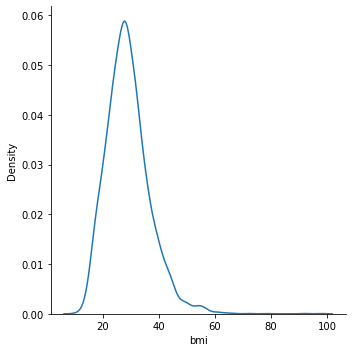

In [6]:
# check normal distribution for age column

import seaborn as sns

normality_plot = sns.displot(data['bmi'], kind = 'kde')

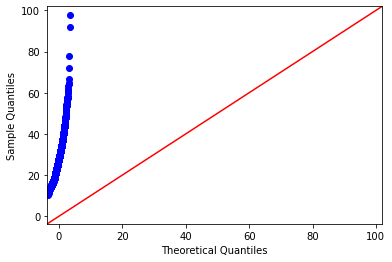

In [7]:
# check normal distribution for age column with Q-Q plot

import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data['bmi'], line='45')
plt.show()

In [12]:
# test 1 (test between bmi for two population) (Mann-Whitney)

import scipy.stats as stats

bmi_no_stroke = data[data['stroke'] == 0]['bmi']
bmi_stroke = data[data['stroke'] == 1]['bmi']

"""
Null hypothesis - there is no statistically significant difference between bmi of stroke and non-stroke patients
Alternative hypothesis - there is statistically significant difference between bmi of stroke and non-stroke patients
p-value < 0.05, we reject the null hypothesis
"""

stats, p = stats.mannwhitneyu(bmi_no_stroke, bmi_stroke)

if (p < 0.05):
    print("p-value is", p)
    print("Null hypothesis rejected")
    #print("Conclusion: there is statistically significant difference between bmi by people who had stroke and by people who have not had stroke")
else:
    print("p-value is", p)
    print("Null hypothesis accepted")
    #print("Conclusion: there is no statistical significantdifference between bmi by people who had stroke and by people who have not had stroke")

p-value is 8.641995373128644e-05
Null hypothesis rejected


In [13]:
# test 2 (test between hypertension and heart disease to see if independent) (Chi-Square Test)

from scipy.stats import chi2_contingency

"""
null hypothesis: the categorical columns hypertension and heart disease are independent
alt hypothesis: the categorical columns hypertension and heart disease are dependent
"""

# copy original data into test data
test_df = data.copy()

# encode the categorical columns used
test_df.loc[test_df['hypertension'] == 1, "hypertension"] = "Yes"
test_df.loc[test_df['hypertension'] == 0, "hypertension"] = "No"
test_df.loc[test_df['heart_disease'] == 1, "heart_disease"] = "Yes"
test_df.loc[test_df['heart_disease'] == 0, "heart_disease"] = "No"

# create a crosstab
contigency_df = pd.crosstab(test_df['hypertension'], test_df['heart_disease'])

chi, p, dof, expected = chi2_contingency(contigency_df)

if (p < 0.05):
    print("p-value is", p)
    print("Null hypothesis rejected")
    #print("Conclusion: the categorical columns hypertension and heart disease are dependent")
else:
    print("p-value is", p)
    print("Null hypothesis accepted")
    #print("Conclusion: the categorical columns hypertension and heart disease are independent")

p-value is 2.208889768960281e-14
Null hypothesis rejected


In [20]:
# test 3 (test between ever_married and stroke to see if independent) (Chi-Square Test)

from scipy.stats import chi2_contingency

"""
residence_type
Rural - 0
Urban - 1

null hypothesis: the categorical columns hypertension and heart disease are independent
alt hypothesis: the categorical columns hypertension and heart disease are dependent
"""

# copy original data into test data
test_df = data.copy()

# encode the categorical columns used
test_df.loc[test_df['Residence_type'] == 1, "Residence_type"] = "Urban"
test_df.loc[test_df['Residence_type'] == 0, "Residence_type"] = "Rural"
test_df.loc[test_df['stroke'] == 1, "stroke"] = "Yes"
test_df.loc[test_df['stroke'] == 0, "stroke"] = "No"

# create a crosstab
contigency_df = pd.crosstab(test_df['Residence_type'], test_df['stroke'])
print(contigency_df)

chi, p, dof, expected = chi2_contingency(contigency_df)

if (p < 0.05):
    print("p-value is", p)
    print("Null hypothesis rejected")
    #print("Conclusion: the categorical columns hypertension and heart disease are dependent")
else:
    print("p-value is", p)
    print("Null hypothesis accepted")
    #print("Conclusion: the categorical columns hypertension and heart disease are independent")

stroke            No  Yes
Residence_type           
Rural           2400  114
Urban           2461  135
p-value is 0.29833169286876987
Null hypothesis accepted


In [22]:
# drop residence_type as independent with stroke

data = data.drop('Residence_type', axis = 1)

In [34]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,228.69,36.6,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,202.21,33.2,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,105.92,32.5,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,171.23,34.4,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,174.12,24.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1.0,0.0,1.0,2.0,83.75,27.3,2.0,0.0
5106,0.0,81.0,0.0,0.0,1.0,3.0,125.20,40.0,2.0,0.0
5107,0.0,35.0,0.0,0.0,1.0,3.0,82.99,30.6,2.0,0.0
5108,1.0,51.0,0.0,0.0,1.0,2.0,166.29,25.6,1.0,0.0


### Dealing with unbalanced dataset

In [35]:
from sklearn.model_selection import train_test_split

# define X and Y
X = data.drop('stroke', axis = 1)
Y = data['stroke']

# split X and Y into testing and training dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30, shuffle = True, stratify = Y)

In [36]:
from imblearn.over_sampling import SMOTE

# upsampling using smote 
# https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html

smote = SMOTE(k_neighbors = 6, random_state = 10)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

In [37]:
Y_train_res.value_counts()

1.0    3888
0.0    3888
Name: stroke, dtype: int64

### Building the model

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# build the pipeline
#random_forest = Pipeline([('scale', StandardScaler()), ('random forest', RandomForestClassifier(random_state = 42))])
#SVM = Pipeline([('scale', StandardScaler()), ('SVM', SVC(random_state = 42))])
#log_reg = Pipeline([('scale', StandardScaler()), ('logistic regression', LogisticRegression(random_state = 42))])

# build the object
random_forest = RandomForestClassifier(random_state = 42)
SVM = SVC(random_state = 42, probability = True)
log_reg = LogisticRegression(random_state = 42, max_iter = 600)

# fit data into the pipeline
random_forest.fit(X_train_res, Y_train_res)
SVM.fit(X_train_res, Y_train_res)
log_reg.fit(X_train_res, Y_train_res)

# get prediction of Y for each model
random_forest_pred = random_forest.predict(X_test)
SVM_pred = SVM.predict(X_test)
log_reg_pred = log_reg.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

# get confusion matrix for all model
random_forest_cf = confusion_matrix(Y_test, random_forest_pred)
SVM_cf = confusion_matrix(Y_test, SVM_pred)
log_reg_cf = confusion_matrix(Y_test, log_reg_pred)

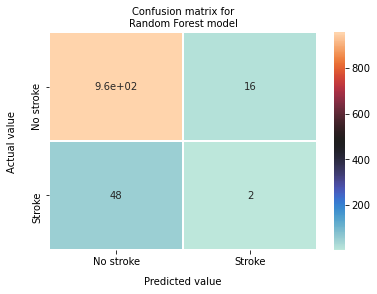

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       972
         1.0       0.11      0.04      0.06        50

    accuracy                           0.94      1022
   macro avg       0.53      0.51      0.51      1022
weighted avg       0.91      0.94      0.92      1022

Accuracy score: 0.9373776908023483
F1 score: 0.058823529411764705


In [40]:
# to know confusion matrix how to label
# https://stackoverflow.com/questions/63649660/how-to-know-scikit-learn-confusion-matrixs-label-order-and-change-it

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import seaborn as sns

heatmap = sns.heatmap(random_forest_cf, 
                      annot = True,
                      cmap = 'icefire',
                      linewidth = '0.5',
                      linecolor = 'white',
                      xticklabels = ['No stroke', 'Stroke'],
                      yticklabels = ['No stroke', 'Stroke'])
heatmap.set_xlabel('Predicted value', labelpad = 10)
heatmap.set_ylabel('Actual value', labelpad = 15)
heatmap.set_title('Confusion matrix for\nRandom Forest model', fontsize = 10)
plt.show()

print(classification_report(Y_test, random_forest_pred))
print("Accuracy score:", accuracy_score(Y_test, random_forest_pred))
print("F1 score:", f1_score(Y_test, random_forest_pred))

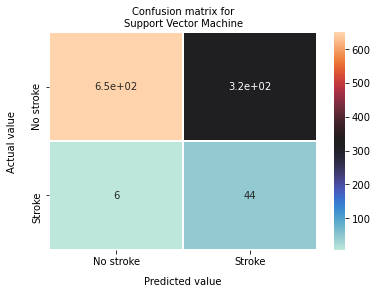

              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80       972
         1.0       0.12      0.88      0.21        50

    accuracy                           0.68      1022
   macro avg       0.56      0.77      0.51      1022
weighted avg       0.95      0.68      0.77      1022

Accuracy score: 0.6790606653620352
F1 score: 0.21153846153846154


In [41]:
heatmap = sns.heatmap(SVM_cf, 
                      annot = True,
                      cmap = 'icefire',
                      linewidth = '0.5',
                      linecolor = 'white',
                      xticklabels = ['No stroke', 'Stroke'],
                      yticklabels = ['No stroke', 'Stroke'])
heatmap.set_xlabel('Predicted value', labelpad = 10)
heatmap.set_ylabel('Actual value', labelpad = 15)
heatmap.set_title('Confusion matrix for\nSupport Vector Machine', fontsize = 10)
plt.show()

print(classification_report(Y_test, SVM_pred))
print("Accuracy score:", accuracy_score(Y_test, SVM_pred))
print("F1 score:", f1_score(Y_test, SVM_pred))

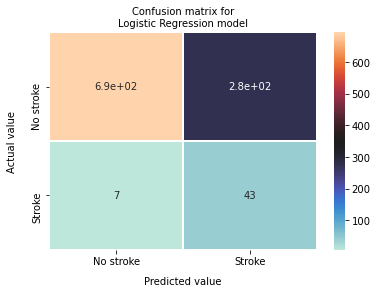

              precision    recall  f1-score   support

         0.0       0.99      0.71      0.83       972
         1.0       0.13      0.86      0.23        50

    accuracy                           0.72      1022
   macro avg       0.56      0.79      0.53      1022
weighted avg       0.95      0.72      0.80      1022

Accuracy score: 0.7211350293542075
F1 score: 0.23180592991913745


In [42]:
heatmap = sns.heatmap(log_reg_cf, 
                      annot = True,
                      cmap = 'icefire',
                      linewidth = '0.5',
                      linecolor = 'white',
                      xticklabels = ['No stroke', 'Stroke'],
                      yticklabels = ['No stroke', 'Stroke'])
heatmap.set_xlabel('Predicted value', labelpad = 10)
heatmap.set_ylabel('Actual value', labelpad = 15)
heatmap.set_title('Confusion matrix for\nLogistic Regression model', fontsize = 10)
plt.show()

print(classification_report(Y_test, log_reg_pred))
print("Accuracy score:", accuracy_score(Y_test, log_reg_pred))
print("F1 score:", f1_score(Y_test, log_reg_pred))

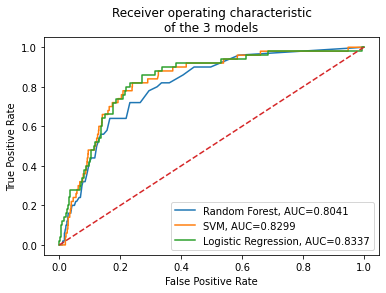

In [44]:
# ROC curve for all 3 models

from sklearn import metrics

# get probability for true cases
random_forest_prob = random_forest.predict_proba(X_test)[:, 1]
SVM_prob = SVM.predict_proba(X_test)[:, 1]
log_reg_prob = log_reg.predict_proba(X_test)[:, 1]

# plot ROC curve for random forest
fpr, tpr, _ = metrics.roc_curve(Y_test, random_forest_prob)
auc = round(metrics.roc_auc_score(Y_test, random_forest_prob), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

# plot ROC curve for SVM
fpr, tpr, _ = metrics.roc_curve(Y_test, SVM_prob)
auc = round(metrics.roc_auc_score(Y_test, SVM_prob), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

# plot ROC curve for logistic regression
fpr, tpr, _ = metrics.roc_curve(Y_test, log_reg_prob)
auc = round(metrics.roc_auc_score(Y_test, log_reg_prob), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# plot straight line in the middle for random guesses
plt.plot([0, 1], [0, 1], '--')

# label the plot 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic\nof the 3 models')

# add legend to the plot
plt.legend()

plt.show()